<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML_SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machines
Breast cancer data

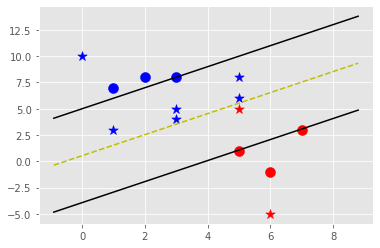

In [47]:
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projekty Machine Learning/ML_KNearestNeighbors/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace = True) #Wypełnienie pustych miejsc "outlierami"
df.drop('id', axis = 1, inplace = True) 

In [ ]:
X = np.array(df.drop(['class'], axis = 1,))
y = np.array(df['class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
accuracy = clf.score(X_test, y_test)
accuracy

0.6

In [ ]:
example_measures = np.array([[4, 2, 1, 1, 1, 2, 3, 2, 1], [4, 2, 1, 2, 2, 2, 3, 2, 1]])
example_measures

array([[4, 2, 1, 1, 1, 2, 3, 2, 1],
       [4, 2, 1, 2, 2, 2, 3, 2, 1]])

In [ ]:
prediction = clf.predict(example_measures)
prediction

array([2, 2])

##Creating SVM from scratch

In [35]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [36]:
data_dict = {-1: np.array([[1, 7], [2, 8], [3, 8]]), 
             1: np.array([[5, 1], [6, -1], [7, 3]])}

In [50]:
class Support_Vector_Machine:
  def __init__(self, visualization = True): #metoda, która zostanie uruchomiona przy inicjalizacji instancji klasy
    self.visualization = visualization
    self.colors = {1: 'r', -1: 'b'}
    if self.visualization:
      self.fig = plt.figure()
      self.ax = self.fig.add_subplot(1, 1, 1)

  def fit(self, data):
    self.data = data
    #{||w||: [w, b]} #Dict keys = magnitudes of vectors
    opt_dict = {}
    transforms = [[1, 1],
                  [-1, 1],
                  [-1, -1],
                  [1, -1]]
    all_data = []

    for yi in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)
    self.max_feature_value = max(all_data)
    self.min_feature_value = min(all_data)
    all_data = None #Removing the data from the memory
    
    step_sizes = [self.max_feature_value * 0.1,
                  self.max_feature_value * 0.01,
                  self.max_feature_value * 0.001]

    b_range_multiple = 5
    b_multiple = 5
    latest_optimum = self.max_feature_value * 10

    for step in step_sizes:
      w = np.array([latest_optimum, latest_optimum])
      optimized_val = False
      while not optimized_val:
        for b in np.arange(-1 * (self.max_feature_value * b_range_multiple), 
                           self.max_feature_value * b_range_multiple,
                           step * b_multiple):
          for transformation in transforms:
            w_t = w * transformation
            found_option = True
            for i in self.data:
              for xi in self.data[i]:
                yi = i
                if not yi * (np.dot(w_t, xi) + b) >= 1:
                  found_option = False
            if found_option:
              opt_dict[np.linalg.norm(w_t)] = [w_t, b]
        if w[0] < 0:
          optimized_val = True
          print('Optimized a step.')
        else:
          w = w - step

      norms = sorted([n for n in opt_dict])
      opt_choice = opt_dict[norms[0]]

      self.w = opt_choice[0]
      self.b = opt_choice[1]

      latest_optimum = opt_choice[0][0] + step * 2

  def predict(self, features):
    #sign(x.w + b)
    classification = np.sign(np.dot(np.array(features), self.w) + self.b)
    if classification != 0 and self.visualization:
      self.ax.scatter(features[0], features[1], s = 100, marker = '*', c = self.colors[classification])
    return classification

  def visualize(self):
    [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[i]) for x in data_dict[i]] for i in data_dict]

    def hyperplane(x, w, b, v):
      return (-w[0] * x - b + v) / w[1]

    datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    #Positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
    psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
    self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    #Negative support vector hyperplane
    nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
    nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
    self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    #decision boundary
    db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
    db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
    self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

    plt.show()

Optimized a step.
Optimized a step.
Optimized a step.


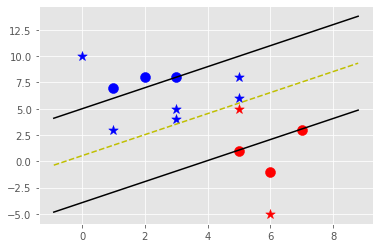

In [51]:
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
# svm.visualize()

to_predict = [[0, 10],
              [1, 3],
              [3, 4],
              [3, 5],
              [5, 5],
              [5, 6],
              [6, -5],
              [5,8]]

for p in to_predict:
  svm.predict(p)
  
svm.visualize()

##Prediction

In [52]:
to_predict = [[0, 10],
              [1, 3],
              [3, 4],
              [3, 5],
              [5, 5],
              [5, 6],
              [6, -5],
              [5,8]]

In [55]:
for p in to_predict:
  print(svm.predict(p))

-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
